# Data Science for Business - Predicting Credit Card Default with KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
np.random.seed(42)
pd.options.display.float_format = '{:.2f}'.format # Turn off scientific notation for large numbers

## Case description

### Credit card default

Credit card default occurs when a cardholder fails to pay the minimum due on their credit card bill for a certain period of time. This can lead to a number of negative consequences, including late fees, increased interest rates, and damage to the cardholder's credit score. In some cases, credit card default can even result in legal action being taken against the cardholder.

## Load Data
Importing the dataset from a CSV file.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/96d117a1f864c0a2701580f784645b1e409fb7b0/Session_01/default.csv')

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


## Summary Statistics
Generating summary statistics of the numerical variables `balance` and `income` and cross-tabulation for the `default` variable.

In [5]:
df.describe()

,balance,income
count,10000.00,10000.00
mean,835.37,33516.98
std,483.71,13336.64
min,0.00,771.97
25%,481.73,21340.46
50%,823.64,34552.64
75%,1166.31,43807.73
max,2654.32,73554.23


In [6]:
pd.crosstab(df['default'], columns='default')


col_0,default
default,
No,9667
Yes,333


## Visualizations
Use seaborn to visually explore the dataset. We create a scatterplot with `balance` and `income` on the x and y axes and `default` as hue.

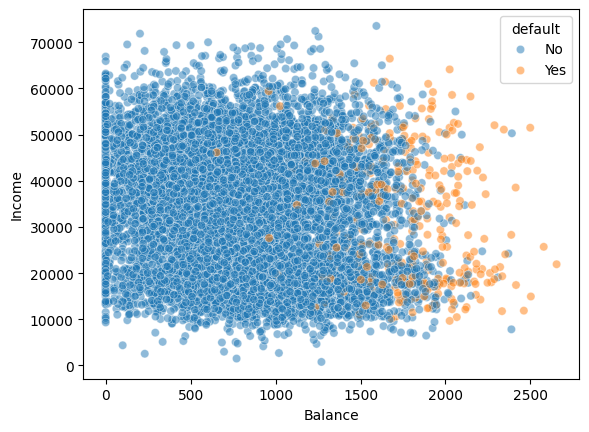

In [11]:
# Scatterplot = Punktewolke (alpha kontrolliert Durchsichtigkeit)
sns.scatterplot(x='balance', y='income', hue='default', alpha=0.5, data=df)
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

## Machine Learning - KNN
Training a K-Nearest Neighbors model to predict credit card default.

We first split the data into features and labels as well as training and testing sets.

In [8]:
# Training und Test Split
X = df[['balance', 'income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the features using StandardScaler, as KNN is sensitive to the scale of the variables.

In [12]:
# Auf eine Einheit bringen
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Fit the KNN model to the training data using k=5.

In [43]:
# Implementation of the K-Nearest Neighbors (KNN) algorithm which is used for classification tasks
# It specifies the number of neighbors to consider when making a prediction. In this case, it's set to 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Use the fitted model to make predictions on the test data. More specifically, we calculate the probabilities of the positive class (default).

In [44]:
# [:, 1]: This part selects the probabilities for the positive class (default, represented by 'Yes').
y_prob = knn.predict_proba(X_test)[: , 1]

In [45]:
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

Let's plot the distribution of predicted probabilities for default.

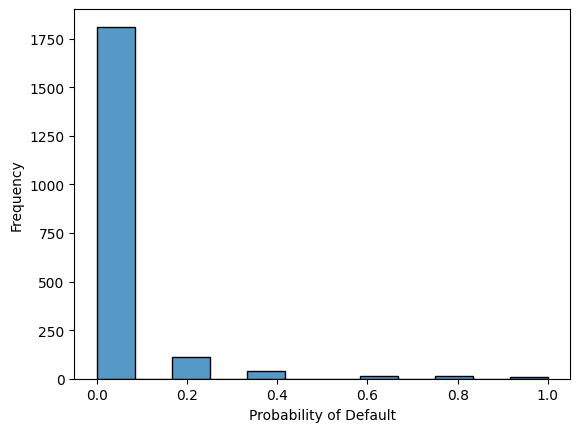

In [46]:
sns.histplot(y_prob)
plt.xlabel('Probability of Default')
plt.ylabel('Frequency')
plt.show()

Transform probabilities into binary outcomes using a threshold of 0.5.

In [47]:
decision_threshold = 0.5
y_pred = np.where(y_prob > decision_threshold, 'Yes', 'No')

Plot a confusion matrix to evaluate the model's performance.

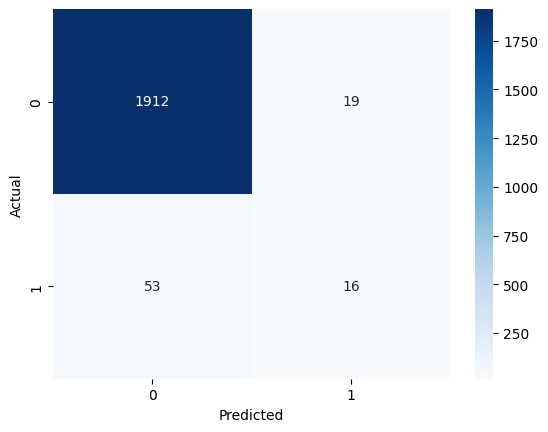

In [48]:
# Calculates a confusion matrix to compare the model's predictions to the true values
# 1912 Werte sind in Wahrheit 0 und wurden auch als 0 vorhergesagt (True Negative)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Print a classification report with precision, recall, F1-score, and accuracy.
* The macro average F1 score is computed using the arithmetic mean of all the per-class F1 scores. Thta is, all classes are treated equally regardless of their support values.
* The weighted average F1 score is computed by averaging the F1 scores of each class, weighted by their support values.

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98      1931
         Yes       0.63      0.17      0.27        69

    accuracy                           0.97      2000
   macro avg       0.80      0.59      0.63      2000
weighted avg       0.96      0.97      0.96      2000



## Your Turn!

Experiment with the above code and:

1.  Change `n_neighbors` and observe how the accuracy of the classifier changes.

2.  Change the `decision threshold` and observe how the accuracy of the classifier changes.

In [25]:
# Implementation of the K-Nearest Neighbors (KNN) algorithm which is used for classification tasks
knn_2 = KNeighborsClassifier(n_neighbors=10)
knn_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
# [:, 1]: This part selects the probabilities for the positive class (default, represented by 'Yes').
y_prob_2 = knn_2.predict_proba(X_test)[: , 1]

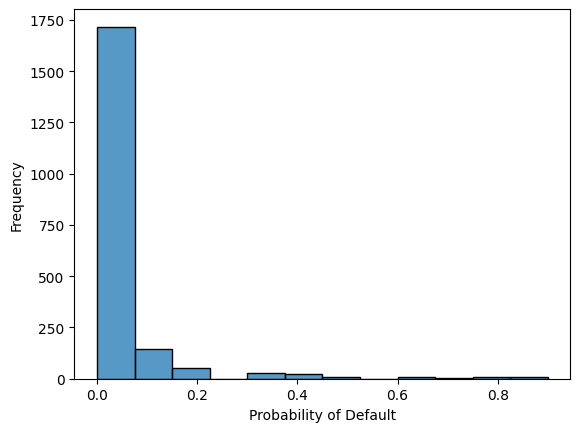

In [27]:
sns.histplot(y_prob_2)
plt.xlabel('Probability of Default')
plt.ylabel('Frequency')
plt.show()

In [28]:
decision_threshold = 0.5
y_pred_2 = np.where(y_prob > decision_threshold, 'Yes', 'No')

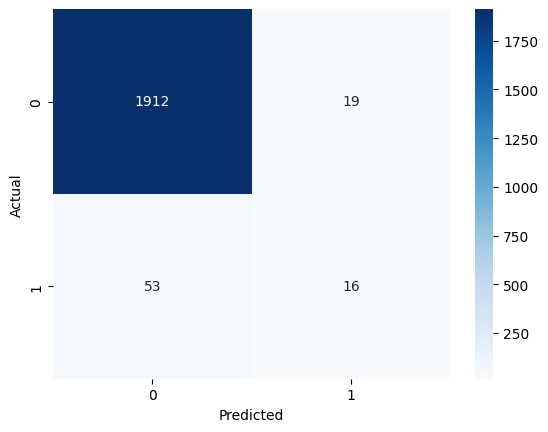

In [29]:
# Calculates a confusion matrix to compare the model's predictions to the true values
# 1912 Werte sind in Wahrheit 0 und wurden auch als 0 vorhergesagt (True Negative)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()